<a href="https://colab.research.google.com/github/unitxero/Data_Analysis_MC/blob/main/Loan_Data_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn==0.20.3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/loan_data.csv')

In [4]:
# checking the DataFrame
df

credit.policy             purpose  ...  pub.rec  not.fully.paid
0                 1  debt_consolidation  ...        0               0
1                 1         credit_card  ...        0               0
2                 1  debt_consolidation  ...        0               0
3                 1  debt_consolidation  ...        0               0
4                 1         credit_card  ...        0               0
...             ...                 ...  ...      ...             ...
9573              0           all_other  ...        0               1
9574              0           all_other  ...        0               1
9575              0  debt_consolidation  ...        0               1
9576              0    home_improvement  ...        0               1
9577              0  debt_consolidation  ...        0               1

[9578 rows x 14 columns]

In [5]:
# looking at the column names of the DataFrame
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [6]:
# may have to drop not.fully.paid, installment
# or test seperately to see if there is a change in the machine learning
# purpose column is what we will predict

In [7]:
df_2 = df.drop(['installment','not.fully.paid'], axis = 1 )

In [8]:
df_2

credit.policy             purpose  ...  delinq.2yrs  pub.rec
0                 1  debt_consolidation  ...            0        0
1                 1         credit_card  ...            0        0
2                 1  debt_consolidation  ...            0        0
3                 1  debt_consolidation  ...            0        0
4                 1         credit_card  ...            1        0
...             ...                 ...  ...          ...      ...
9573              0           all_other  ...            0        0
9574              0           all_other  ...            0        0
9575              0  debt_consolidation  ...            0        0
9576              0    home_improvement  ...            0        0
9577              0  debt_consolidation  ...            0        0

[9578 rows x 12 columns]

## EDA

In [9]:
# looking at the data types in the DataFrame
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 898.1+ KB


In [10]:
# looking at some descriptive statistics 
df_2.describe()

credit.policy     int.rate  ...  delinq.2yrs      pub.rec
count    9578.000000  9578.000000  ...  9578.000000  9578.000000
mean        0.804970     0.122640  ...     0.163708     0.062122
std         0.396245     0.026847  ...     0.546215     0.262126
min         0.000000     0.060000  ...     0.000000     0.000000
25%         1.000000     0.103900  ...     0.000000     0.000000
50%         1.000000     0.122100  ...     0.000000     0.000000
75%         1.000000     0.140700  ...     0.000000     0.000000
max         1.000000     0.216400  ...    13.000000     5.000000

[8 rows x 11 columns]

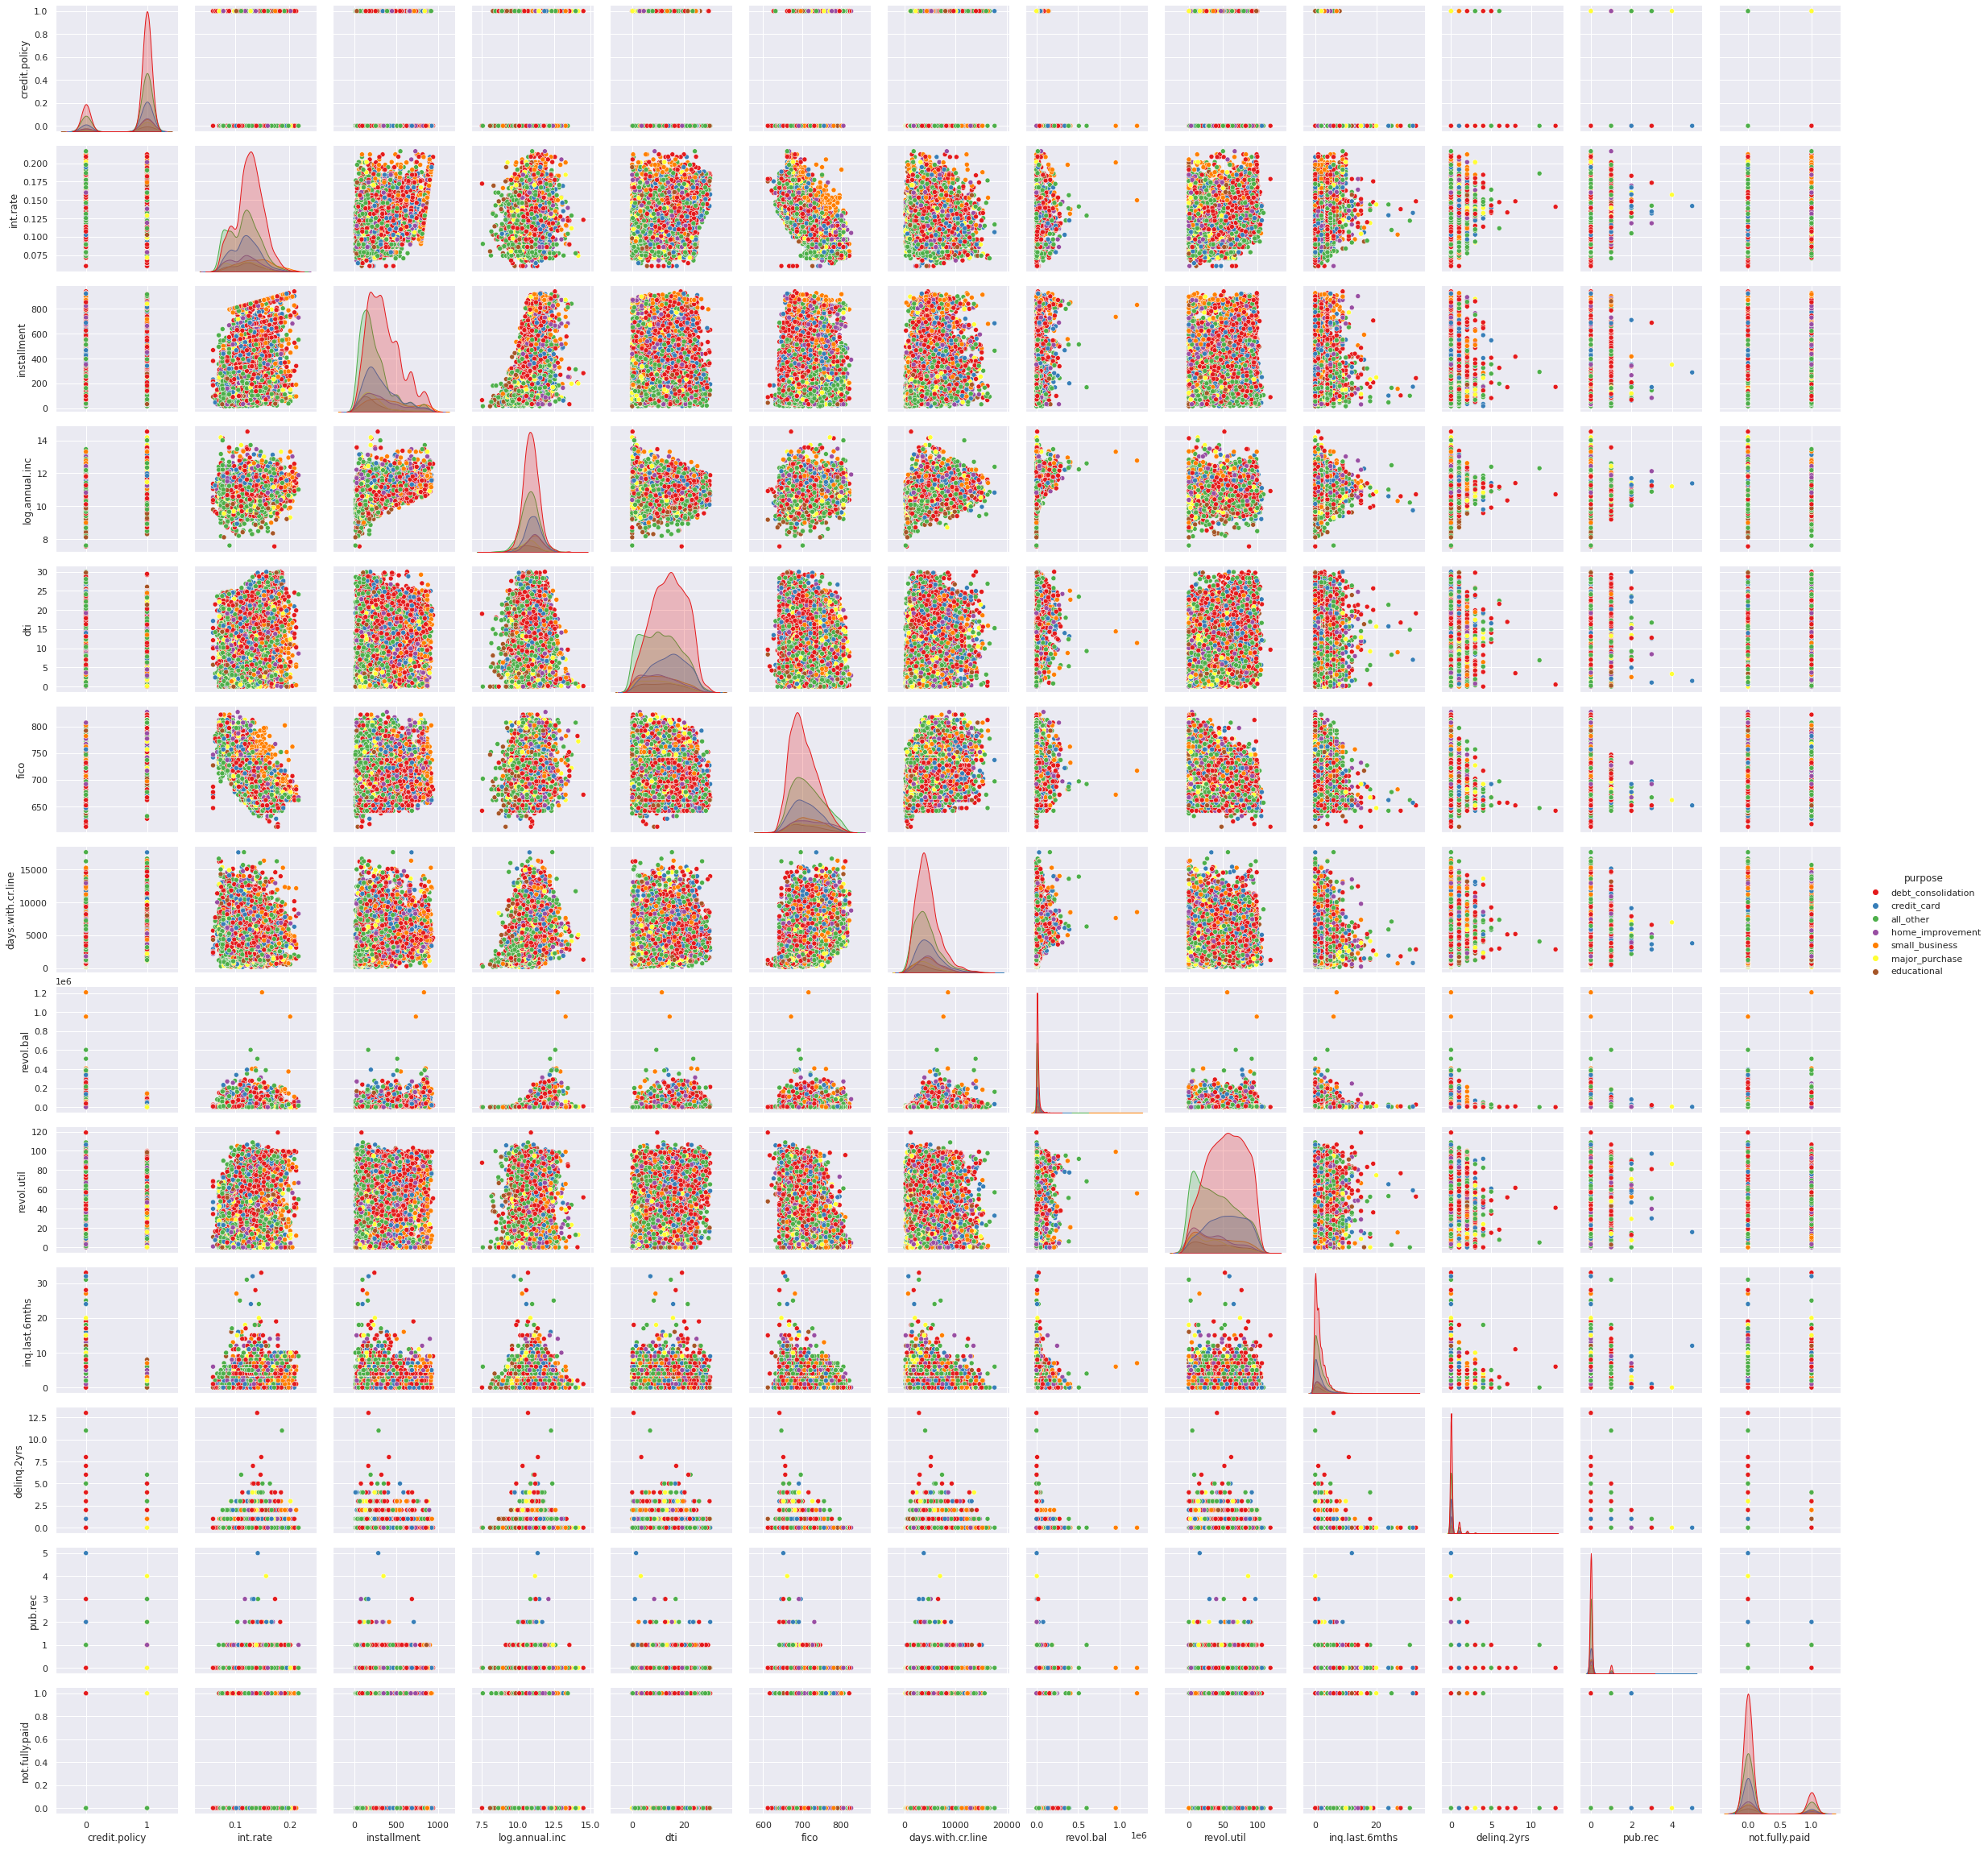

In [11]:
# WARNING!!! running this cell takes a significant amount of resources to process
# creating pair plot
sns.pairplot(df,hue='purpose',palette='Set1')

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# X is our feature selection, so we do not include our predictor
# y is our predictor
X = df_2.drop('purpose',axis=1)
y = df_2['purpose']

In [14]:
# splitting the data 70/30, 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Decision Trees

In [15]:
# loading up our DecisionTree function, and assigning it to dtree
# fitting a model using X_train and y_train data
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predicition and Evaluation

## Insight 1

We see the model is not very good at accurately predicting anything with certainty.
Only debt_consolidation is being predicted at a 47% accuracy. Which is not very good, but is the best overall.

In [16]:
# running predictions on the X_test data
# printing a confusion matrix to see the results

predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                    precision    recall  f1-score   support

         all_other       0.29      0.28      0.29       713
       credit_card       0.16      0.17      0.16       400
debt_consolidation       0.46      0.47      0.47      1139
       educational       0.06      0.05      0.06       120
  home_improvement       0.10      0.11      0.11       178
    major_purchase       0.11      0.10      0.10       139
    small_business       0.25      0.27      0.26       185

         micro avg       0.31      0.31      0.31      2874
         macro avg       0.21      0.21      0.21      2874
      weighted avg       0.31      0.31      0.31      2874



In [17]:
# results but in basic matrix form
print(confusion_matrix(y_test,predictions))

[[199  94 245  32  61  39  43]
 [ 87  66 176   8  23  14  26]
 [238 173 536  31  67  36  58]
 [ 31  21  39   6   7  14   2]
 [ 48  26  62   1  20  10  11]
 [ 39   6  56   6   7  14  11]
 [ 34  23  50  11  12   5  50]]


## Tree Visualization

In [18]:
# Preparing to load up columns to print out our decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df_2.columns[1:])
features

['purpose',
 'int.rate',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec']

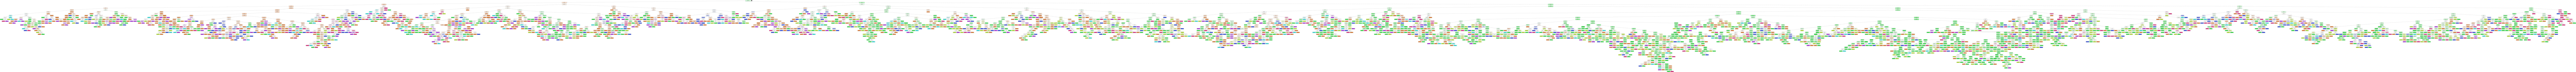

In [19]:
# plot of our decision tree
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Testing with credit policy removed

In [20]:
# removing credit policy and running another decision tree
df_3 = df.drop(['installment','not.fully.paid', 'credit.policy'], axis = 1 )

In [21]:
# X is our feature selection, so we do not include our predictor
# y is our predictor
X = df_3.drop('purpose',axis=1)
y = df_3['purpose']

In [22]:
# splitting the data 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [23]:
# decision tree function is assigned to dtree variable
# data is fitted to a model
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Insight 2

With credit policy removed
We see that the model performed worse/similar
Which could be expected if you think about it in real terms
If the loan applicant had a credit policy with you already, you may have more history with them. Meaning you could predict where in their financial life cycle the person may have been in. Home buying phase, car buying phase, over burden with credit card debt, so on and so forth

In [24]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                    precision    recall  f1-score   support

         all_other       0.29      0.29      0.29       673
       credit_card       0.17      0.18      0.17       375
debt_consolidation       0.50      0.49      0.49      1227
       educational       0.03      0.03      0.03        97
  home_improvement       0.11      0.11      0.11       192
    major_purchase       0.04      0.04      0.04       125
    small_business       0.22      0.22      0.22       185

         micro avg       0.32      0.32      0.32      2874
         macro avg       0.19      0.19      0.19      2874
      weighted avg       0.33      0.32      0.32      2874



## Random Forests

In [25]:
# importing RandomForest Classifier function and assigning it to rfc
# we are giving the forest 100 trees here with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
# we run some predictions on X_test data
rfc_pred = rfc.predict(X_test)

In [27]:
# confusion matrix is printed with predictions of the model on the testing data
print(confusion_matrix(y_test, rfc_pred))

[[ 289   22  344    3   12    0    3]
 [  79   25  262    0    3    1    5]
 [ 168   41 1001    0    6    3    8]
 [  30    3   61    1    1    0    1]
 [  85    7   87    0    7    0    6]
 [  55    1   63    1    3    0    2]
 [  43    5   93    1    4    1   38]]


## Insight 3

So in comparison to decision trees
There was an improvement in precision for debt_consolidation and small_business

The algorithim is able to accurately predict those two types of loans 51% and 55% of the time respectively.

We had a trade off though, with no ability to predict a educational or major_purchase loan

In [28]:
print(classification_report(y_test, rfc_pred))

                    precision    recall  f1-score   support

         all_other       0.39      0.43      0.41       673
       credit_card       0.24      0.07      0.10       375
debt_consolidation       0.52      0.82      0.64      1227
       educational       0.17      0.01      0.02        97
  home_improvement       0.19      0.04      0.06       192
    major_purchase       0.00      0.00      0.00       125
    small_business       0.60      0.21      0.31       185

         micro avg       0.47      0.47      0.47      2874
         macro avg       0.30      0.22      0.22      2874
      weighted avg       0.40      0.47      0.41      2874



In [29]:
# increasing trees to 500
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test, rfc_pred))

[[ 287   19  353    1    8    1    4]
 [  70   23  278    0    2    0    2]
 [ 175   33 1002    1    9    2    5]
 [  36    4   54    1    1    0    1]
 [  75    5   98    0    8    0    6]
 [  55    1   62    1    2    2    2]
 [  42    5   93    1    3    0   41]]


## Insight 4
When the Random forest was increased to have 500 trees, we were able to see a dramatic improvement in educational loan accuracy. Which is at 100%

small_business took an accuracy hit by 4%
debt_consolidation remained the same.
all_other improved by 1%
credit_card had a decrease
home_improvement had an increase
major_purchase remains at 0%

In [32]:
print(classification_report(y_test, rfc_pred))

                    precision    recall  f1-score   support

         all_other       0.39      0.43      0.41       673
       credit_card       0.26      0.06      0.10       375
debt_consolidation       0.52      0.82      0.63      1227
       educational       0.20      0.01      0.02        97
  home_improvement       0.24      0.04      0.07       192
    major_purchase       0.40      0.02      0.03       125
    small_business       0.67      0.22      0.33       185

         micro avg       0.47      0.47      0.47      2874
         macro avg       0.38      0.23      0.23      2874
      weighted avg       0.43      0.47      0.41      2874



## KNN Classification

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# using variable 'df_2' as the dataset

In [35]:
df_2.head()

credit.policy             purpose  ...  delinq.2yrs  pub.rec
0              1  debt_consolidation  ...            0        0
1              1         credit_card  ...            0        0
2              1  debt_consolidation  ...            0        0
3              1  debt_consolidation  ...            0        0
4              1         credit_card  ...            1        0

[5 rows x 12 columns]

In [36]:
# importing StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [37]:
# assigning the StandardScaler() function to scalar
scalar = StandardScaler()

In [38]:
# so we are dropping what we want to predict 'purpose' from the dataframe
# fitting a model afterwards
scalar.fit(df_2.drop('purpose', axis = 1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:

scaled_features = scalar.transform(df_2.drop('purpose', axis = 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [40]:
df_2.columns

Index(['credit.policy', 'purpose', 'int.rate', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec'],
      dtype='object')

In [41]:
df_2_col = df_2.drop(labels = 'purpose', axis = 1)

In [42]:
df_2_col

credit.policy  int.rate  ...  delinq.2yrs  pub.rec
0                 1    0.1189  ...            0        0
1                 1    0.1071  ...            0        0
2                 1    0.1357  ...            0        0
3                 1    0.1008  ...            0        0
4                 1    0.1426  ...            1        0
...             ...       ...  ...          ...      ...
9573              0    0.1461  ...            0        0
9574              0    0.1253  ...            0        0
9575              0    0.1071  ...            0        0
9576              0    0.1600  ...            0        0
9577              0    0.1392  ...            0        0

[9578 rows x 11 columns]

In [43]:
df_feature = pd.DataFrame(data = scaled_features,
                          columns = df_2_col.columns[:])

In [44]:
df_feature.head()

credit.policy  int.rate  ...  delinq.2yrs   pub.rec
0       0.492222 -0.139318  ...    -0.299730 -0.237003
1       0.492222 -0.578868  ...    -0.299730 -0.237003
2       0.492222  0.486484  ...    -0.299730 -0.237003
3       0.492222 -0.813544  ...    -0.299730 -0.237003
4       0.492222  0.743509  ...     1.531147 -0.237003

[5 rows x 11 columns]

In [45]:
# import train test split
from sklearn.model_selection import train_test_split

# splitting the data 30% testing, 70% training
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    df_2['purpose'],
                                                    test_size = 0.30)

In [46]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# setting KNN Classifier to nearest neighbors 5
# and saving it to knn var
knn = KNeighborsClassifier(n_neighbors = 5)

In [48]:
# fitting a model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
# running predictions on X_test (testing data)
predict = knn.predict(X_test)

In [50]:
predict

array(['debt_consolidation', 'debt_consolidation', 'debt_consolidation',
       ..., 'credit_card', 'home_improvement', 'all_other'], dtype=object)

In [51]:
# lets create the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
# confusion matrix print out
print(confusion_matrix(y_test, predict))

[[274  69 307   5  15  10   5]
 [108  53 233   2   6   0   1]
 [298 118 720   6  18   7   9]
 [ 39   3  53   1   1   4   0]
 [ 71  19  77   3   7   2   4]
 [ 58  12  63   1   4   2   1]
 [ 55  11  81   0   8   2  28]]


In [53]:
col_names = ['all_other','credit_card','debt_consol','edu','home_improv',
             'major_pur','small_bsns']

## KNN Insight
With a k = 5
We see that debt_consol and small_bsns 
has the best accuracy at over 48

Further below, we see that a better model may be created with a k = 15

Text(0.5, 1.0, 'Accuracy Score:0.44711203897007656')

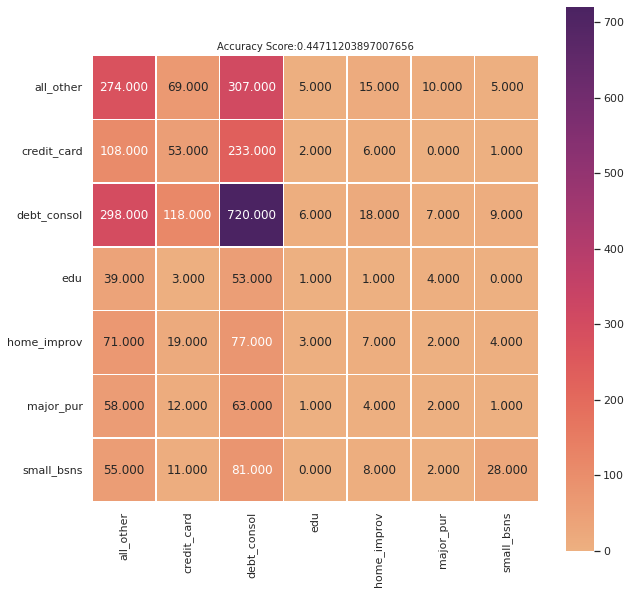

In [61]:
# confusion matrix plotted for better interpretation

plt.figure(figsize = (10, 10))

sns.heatmap(confusion_matrix(y_test, predict),
            annot = True,
            fmt = '.3f',
            linewidths = .5,
            square = True,
            cmap="flare",
            xticklabels = col_names,
            yticklabels = col_names)
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score:{knn.score(X_test, y_test)}'
plt.title(all_sample_title, size = 10)

In [55]:
print(classification_report(y_test, predict))

                    precision    recall  f1-score   support

         all_other       0.30      0.40      0.35       685
       credit_card       0.19      0.13      0.15       403
debt_consolidation       0.47      0.61      0.53      1176
       educational       0.06      0.01      0.02       101
  home_improvement       0.12      0.04      0.06       183
    major_purchase       0.07      0.01      0.02       141
    small_business       0.58      0.15      0.24       185

         micro avg       0.38      0.38      0.38      2874
         macro avg       0.26      0.19      0.20      2874
      weighted avg       0.34      0.38      0.34      2874



In [56]:
# running to see which k value to use

# this is a place holder for Accuracy
from sklearn import metrics
score = []

In [57]:
# running KNN from 1 to 40 for nearest neighbors and seeing the scores for accuracy
# storing these results in the score variable
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test, y_pred))

print(score)

[0.32254697286012524, 0.3169798190675017, 0.3569937369519833, 0.3705636743215031, 0.37752261656228253, 0.39526791927627003, 0.40396659707724425, 0.4112734864300626, 0.41614474599860823, 0.4175365344467641, 0.4290187891440501, 0.42171189979123175, 0.42275574112734865, 0.42588726513569936, 0.4290187891440501, 0.4318023660403619, 0.43667362560890743, 0.4359777313848295, 0.43910925539318024, 0.43702157272094644, 0.4384133611691023, 0.4405010438413361, 0.4439805149617258, 0.44119693806541405, 0.4429366736256089, 0.4450243562978427, 0.44015309672929714, 0.4405010438413361, 0.44224077940153095, 0.4429366736256089, 0.44815588030619347, 0.4485038274182324, 0.4443284620737648, 0.4439805149617258, 0.4429366736256089, 0.4405010438413361, 0.441892832289492, 0.44154488517745305, 0.44711203897007656]


Text(0, 0.5, 'Testing Accuracy')

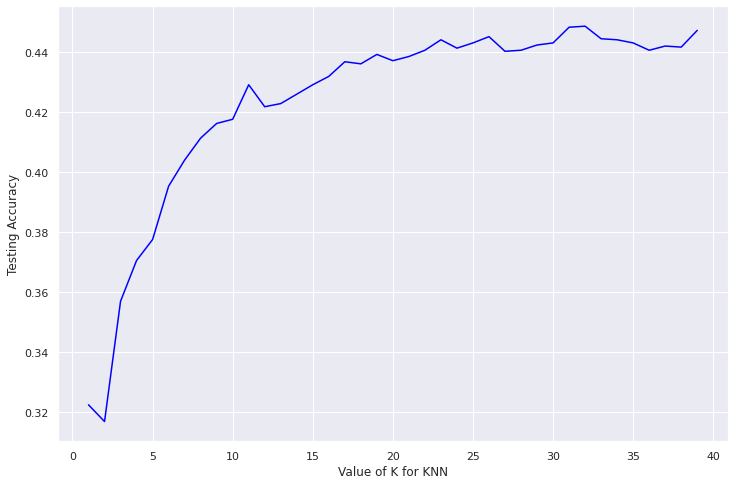

In [58]:
# creating a plot to see how the K value affects accuracy
# from K values 1 to 39
plt.figure(figsize=(12,8))
plt.plot(range(1,40), score, color = 'blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [59]:
# running KNN from 1 to 40 for nearest neighbors and seeing the error rate
# storing these results in the error_rate variable
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

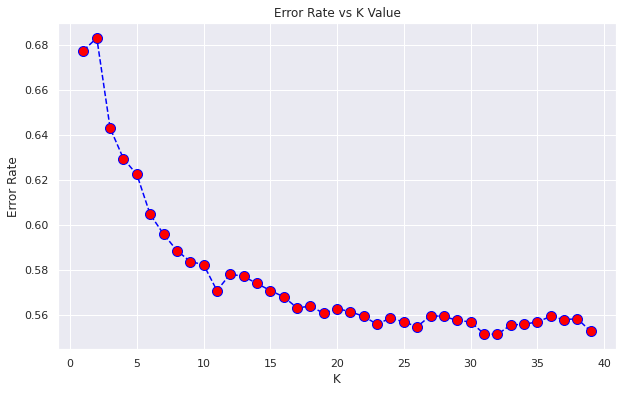

In [60]:
# plotting the error rate to see how it interacts with the previous chart which
# shows accuracy
# seems k = 15 would be ideal to select after running a comparison of error rate
# and accuracy.
# in terms of lower error rate (0.045%), and satisfactory accuracy of 93.5%

plt.figure(figsize = (10,6))
plt.plot(
         range(1,40),
         error_rate,
         color = 'blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor = 'red',
         markersize = 10
         )
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")